In [ ]:
!pip install matplotlib
!pip install seaborn
!pip install geopandas

In [1]:
# import the necessary packages

import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd


In [2]:
world_map = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
world_map.head()

C:\Users\hichi\AppData\Local\Temp\ipykernel_8628\2423181955.py:1: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world_map = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))


,pop_est,continent,name,iso_a3,gdp_md_est,geometry
0,889953.0,Oceania,Fiji,FJI,5496,"MULTIPOLYGON (((180.00000 -16.06713, 180.00000..."
1,58005463.0,Africa,Tanzania,TZA,63177,"POLYGON ((33.90371 -0.95000, 34.07262 -1.05982..."
2,603253.0,Africa,W. Sahara,ESH,907,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,37589262.0,North America,Canada,CAN,1736425,"MULTIPOLYGON (((-122.84000 49.00000, -122.9742..."
4,328239523.0,North America,United States of America,USA,21433226,"MULTIPOLYGON (((-122.84000 49.00000, -120.0000..."


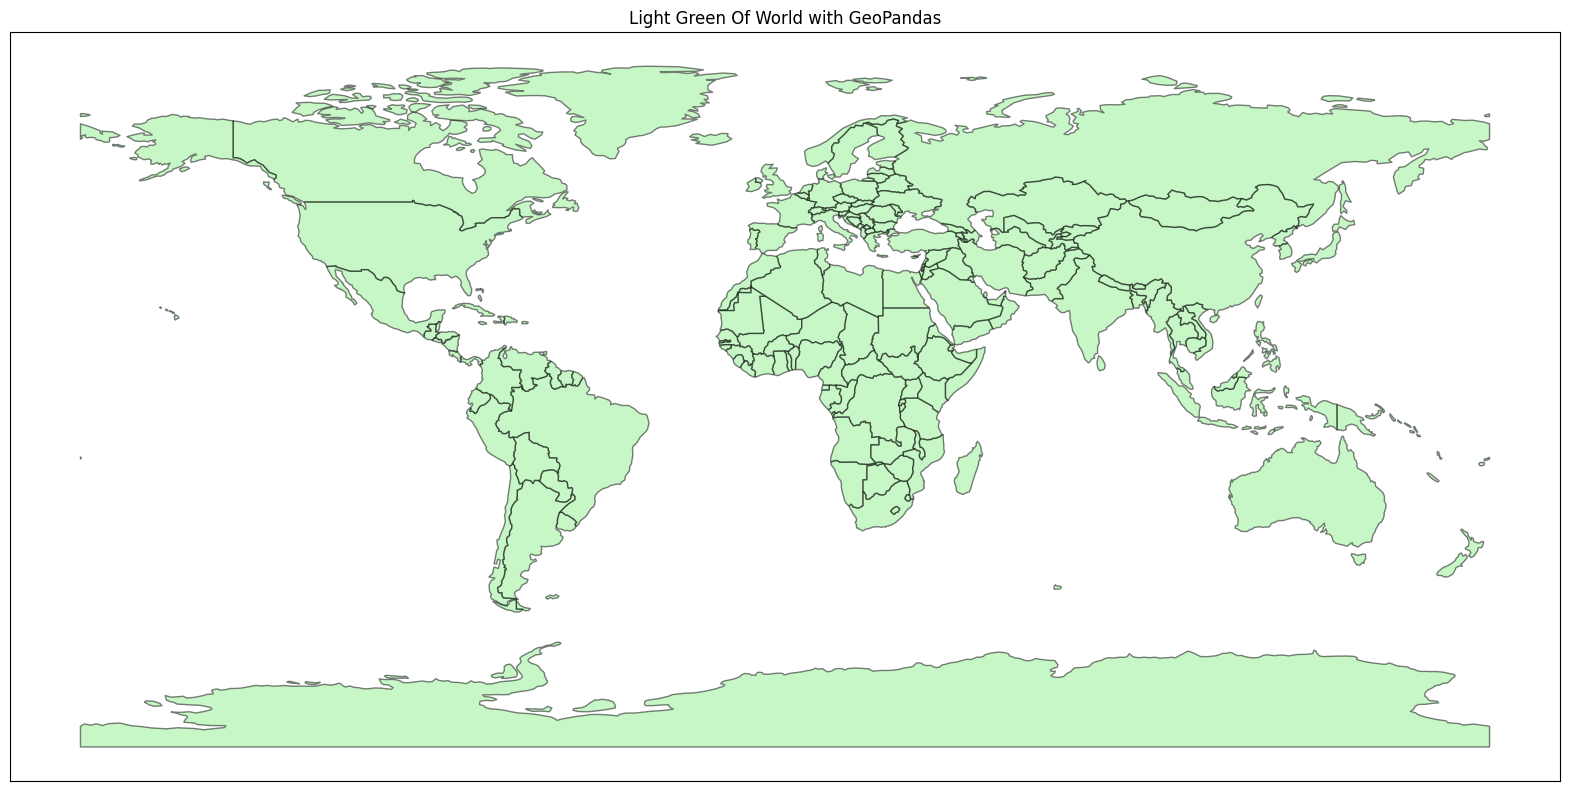

In [3]:
# initialize an empty figure and add an axis
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot()

# plot a basic map of the world
world_map.plot(
    ax=ax,
    color="lightgreen",
    edgecolor="black",
    alpha=0.5
)

# turn off axis ticks
ax.set_xticks([])
ax.set_yticks([])

# set the plot title
plt.title("Light Green Of World with GeoPandas")
plt.show()


In [4]:
world_map["continent"].value_counts()

continent
Africa                     51
Asia                       47
Europe                     39
North America              18
South America              13
Oceania                     7
Seven seas (open ocean)     1
Antarctica                  1
Name: count, dtype: int64

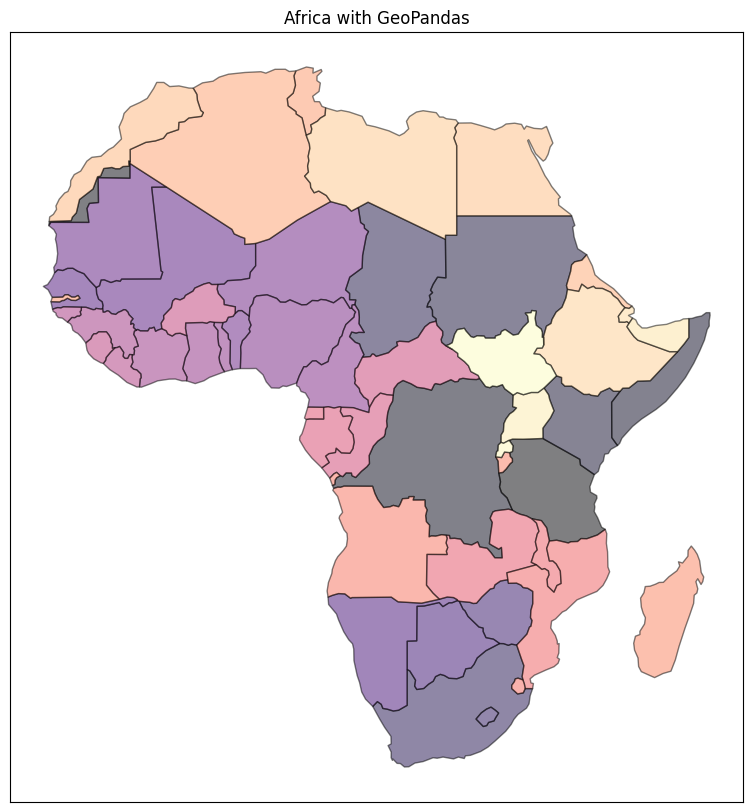

In [5]:
# initialize a new figure
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot()

africa = world_map[world_map["continent"] == "Africa"]

africa.plot(
    ax=ax,
    cmap="magma",
    edgecolor="black",
    alpha=0.5
)

ax.set_xticks([])
ax.set_yticks([])

plt.title("Africa with GeoPandas")
plt.show()

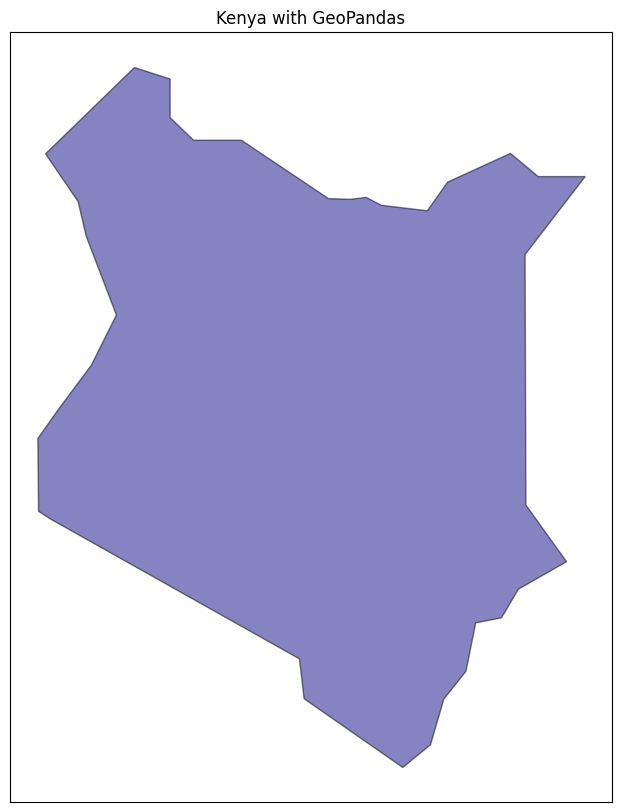

In [6]:
# initialize a new figure
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot()

# Only grab the country of Kenya
kenya = africa[africa["name"] == "Kenya"]

kenya.plot(
    ax=ax,
    cmap="plasma",
    edgecolor="black",
    alpha=0.5
)

ax.set_xticks([])
ax.set_yticks([])

plt.title("Kenya with GeoPandas")
plt.show()

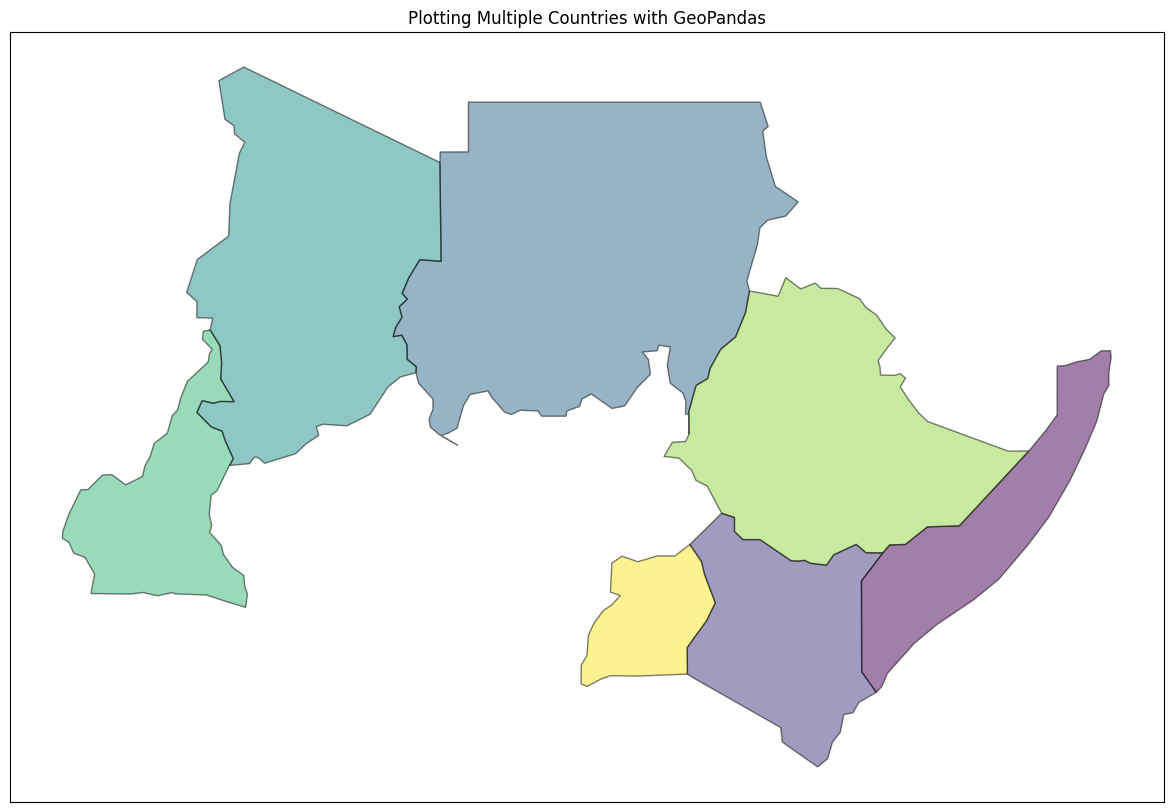

In [7]:
fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot()


country_names = [
    "Kenya",
    "Somalia",
    "Uganda",
    "Ethiopia",
    "Sudan",
    "South Sudan",
    "Chad",
    "Cameroon",
]

countries = africa[
    africa["name"].isin(country_names)
]

countries.plot(
    ax=ax,
    cmap="viridis",
    edgecolor="black",
    alpha=0.5
)

ax.set_xticks([])
ax.set_yticks([])

plt.title("Plotting Multiple Countries with GeoPandas")
plt.show()

[(0.9677975592919913, 0.44127456009157356, 0.5358103155058701), (0.7350228985632719, 0.5952719904750953, 0.1944419133847522), (0.3126890019504329, 0.6928754610296064, 0.1923704830330379), (0.21044753832183283, 0.6773105080456748, 0.6433941168468681), (0.23299120924703914, 0.639586552066035, 0.9260706093977744), (0.9082572436765556, 0.40195790729656516, 0.9576909250290225)]


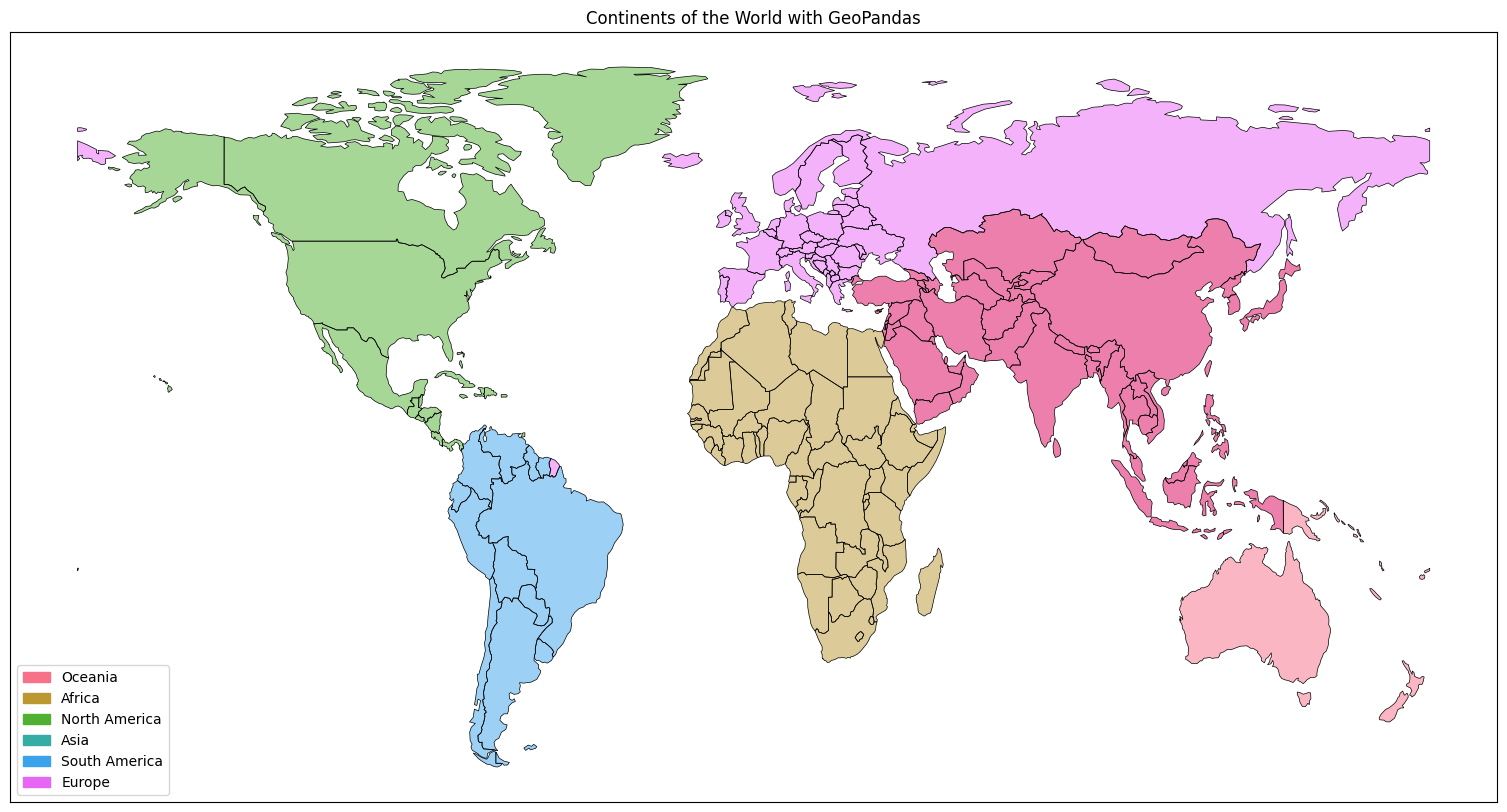

In [42]:

fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot()

drop_idxs = world_map["continent"].isin([
    "Antarctica",
    "Seven seas (open ocean)"
])
world_map = world_map.drop(world_map[drop_idxs].index)

world_map.boundary.plot(
    ax=ax,
    color="black",
    linewidth=0.5
)


continents = world_map["continent"].unique()
colors = sns.color_palette("husl", len(continents))
patches = []

for (continent_name, color) in list(zip(continents, colors)):
    continent = world_map[world_map["continent"] == continent_name]
    if "India" in continent.name.values:
        continent.plot(ax=ax,color="#DB005B",alpha=0.5)
    else:
        continent.plot(ax=ax, color=color, alpha=0.5)

    patch = mpatches.Patch(label=continent_name, color=color)
    patches.append(patch)

# add the patches to the map
ax.legend(handles=patches, loc="lower left")

# turn off axis ticks
ax.set_xticks([])
ax.set_yticks([])

# set the plot title
plt.title("Continents of the World with GeoPandas")
plt.show()